In [173]:
import pandas as pd
import numpy as np
import requests
import urllib.parse
from urllib.parse import quote
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt
import time
from datetime import datetime, timedelta
import seaborn as sns
plt.style.use("ggplot")

#Air Quality API
with open('air_quality_api_key.txt', 'r') as file:
    api_key = file.read()

#Base URL
base_url = "https://api.weatherbit.io/v2.0"

In [41]:
endpoint = f"/history/airquality/history?lat={40.2338}&lon={-111.6585}&start_date=2023-10-01&end_date={(datetime.today() - timedelta(days=2)).strftime('%Y-%m-%d')}&tz=local&key={api_key}"
url = base_url+endpoint

response = requests.get(url)

In [51]:
response = requests.get(f"https://api.weatherbit.io/v2.0/current/airquality?lat={40.2338}&lon={-111.6585}&key={api_key}")
response.json()

{'city_name': 'Provo',
 'country_code': 'US',
 'data': [{'aqi': 39,
   'co': 90,
   'mold_level': 1,
   'no2': 3,
   'o3': 84,
   'pm10': 12,
   'pm25': 7,
   'pollen_level_grass': 0,
   'pollen_level_tree': 1,
   'pollen_level_weed': 3,
   'predominant_pollen_type': 'Weeds',
   'so2': 4}],
 'lat': 40.2338,
 'lon': -111.6585,
 'state_code': 'UT',
 'timezone': 'America/Denver'}

In [55]:
response = requests.get(f"https://api.weatherbit.io/v2.0/history/airquality?lat={40.2338}&lon={-111.6585}&start_date=2023-09-05&end_date=2023-09-30&tz=local&key={api_key}")
september_data = response.json()

In [100]:
data = pd.DataFrame(september_data["data"])[["aqi", "co", "datetime", "no2", "o3", "pm10", "pm25", "so2"]]
data["datetime"] = pd.to_datetime(data['datetime'], format='%Y-%m-%d:%H')
data["date"] = pd.to_datetime(data['datetime'].dt.date)

In [92]:
citations = pd.read_csv("ParkingCitationsEncrypted.csv")
citations = citations.rename(columns={'IssuedDate': 'date'})
citations["date"] = pd.to_datetime(citations["date"])
september_citations = citations[(citations["date"].dt.month == 9) & (citations["date"].dt.year == 2023) & (citations["date"].dt.day >= 5)].copy().reset_index(drop=True)

In [101]:
september_citations["hour"] = pd.to_datetime(september_citations["IssuedTime"]).dt.hour
data["hour"] = pd.to_datetime(data["datetime"]).dt.hour

In [146]:
air_quality_citations = pd.merge(september_citations, data, on=["date", "hour"], how='left')
air_quality_citations

,Citation,License.Plate.Vin,Fine,Issued,CitationText,Unpaid,Officer,Residence,date,IssuedTime,hour,aqi,co,datetime,no2,o3,pm10,pm25,so2
0,P1-24496,UT 42UE7F,60,"Sep 06, 2023 08:47 AM",APPEAL TIME LIMIT EXPIRED,True,1,UT,2023-09-06,08:47 AM,8,31,107.3,2023-09-06 08:00:00,7.7,66.3,4.0,3.00,3.0
1,P1-24497,** B5F83291R30738L6,0,"Sep 06, 2023 08:53 AM",NaN,False,1,**,2023-09-06,08:53 AM,8,31,107.3,2023-09-06 08:00:00,7.7,66.3,4.0,3.00,3.0
2,P1-24498,** U14KN,0,"Sep 06, 2023 08:56 AM",NaN,False,1,**,2023-09-06,08:56 AM,8,31,107.3,2023-09-06 08:00:00,7.7,66.3,4.0,3.00,3.0
3,P1-24499,** MN6P4,0,"Sep 06, 2023 08:59 AM",NaN,False,1,**,2023-09-06,08:59 AM,8,31,107.3,2023-09-06 08:00:00,7.7,66.3,4.0,3.00,3.0
4,P1-24500,** CS05C,0,"Sep 06, 2023 09:01 AM",NaN,False,1,**,2023-09-06,09:01 AM,9,31,105.0,2023-09-06 09:00:00,7.0,67.0,4.0,3.00,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,P8-26313,CO 0K6V04,60,"Sep 28, 2023 05:21 PM",APPEAL,True,8,CO,2023-09-28,05:21 PM,17,47,75.7,2023-09-28 17:00:00,1.3,101.3,7.0,5.25,11.3
1606,P8-26314,WA ZI30B44,60,"Sep 29, 2023 09:34 AM",NaN,False,8,WA,2023-09-29,09:34 AM,9,42,89.0,2023-09-29 09:00:00,5.0,78.0,5.0,3.75,10.0
1607,P8-26315,UT 28KWU1,60,"Sep 29, 2023 10:01 AM",APPEAL,True,8,UT,2023-09-29,10:01 AM,10,42,86.3,2023-09-29 10:00:00,5.0,78.3,4.7,3.50,10.3
1608,P8-26316,UT 7ZXC7,60,"Sep 29, 2023 10:06 AM",APPEAL,True,8,UT,2023-09-29,10:06 AM,10,42,86.3,2023-09-29 10:00:00,5.0,78.3,4.7,3.50,10.3


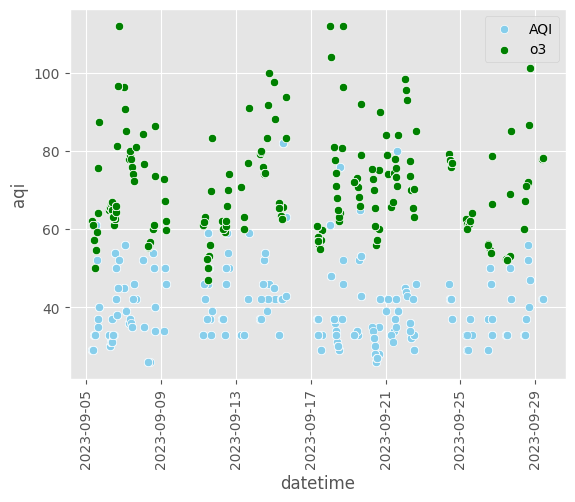

In [119]:
sns.scatterplot(x='datetime', y='aqi', data=air_quality_citations, color='skyblue', label='AQI')
sns.scatterplot(x='datetime', y='o3', data=air_quality_citations, color='green', label='o3')

plt.xticks(rotation=90)

plt.show()

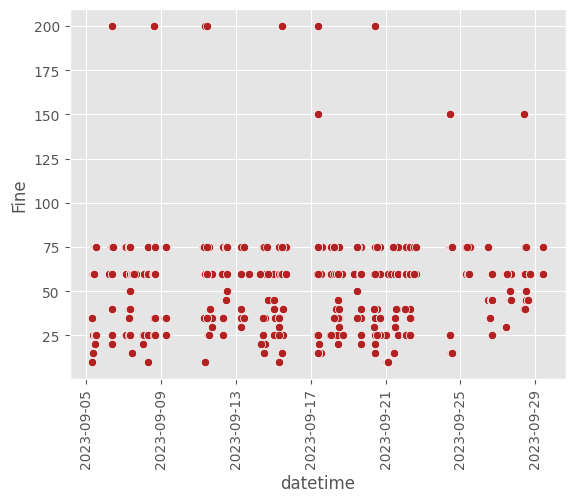

In [124]:
sns.scatterplot(x='datetime', y='Fine', data=air_quality_citations[air_quality_citations["Fine"] > 0], color='firebrick')

plt.xticks(rotation=90)

plt.show()

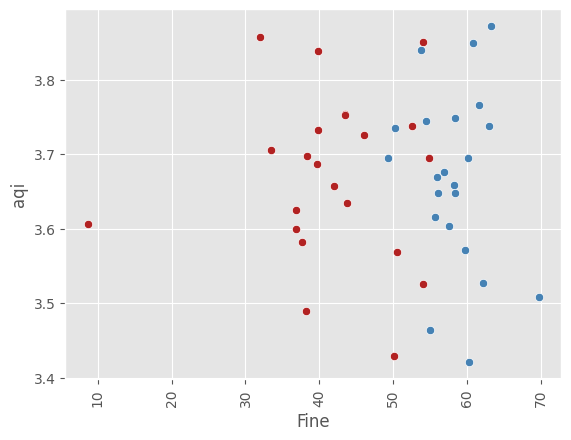

In [147]:
air_quality_citations["aqi"] = np.log(air_quality_citations["aqi"])

average_aqi = air_quality_citations.groupby("date")[["aqi", "Fine"]].mean().reset_index()
average_aqi2 = air_quality_citations[air_quality_citations["Fine"] > 0].groupby("date")[["aqi", "Fine"]].mean().reset_index()
sns.scatterplot(x='Fine', y='aqi', data=average_aqi, color='firebrick')
sns.scatterplot(x='Fine', y='aqi', data=average_aqi2, color='steelblue')

plt.xticks(rotation=90)

plt.show()

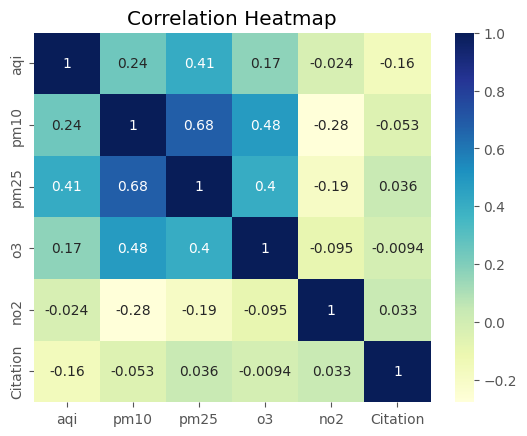

In [167]:
air_quality_citations.groupby("date").count().values
air_quality_citations_count = pd.merge(air_quality_citations.groupby("date")[["aqi", "pm10", "pm25", "o3", "no2"]].mean().reset_index(),
         air_quality_citations.groupby("date")["Citation"].count().reset_index())
sns.heatmap(air_quality_citations_count[["aqi", "pm10", "pm25", "o3", "no2", "Citation"]].corr(), cmap="YlGnBu", annot=True)

plt.title("Correlation Heatmap")

plt.show()

In [170]:
weather_citations = pd.read_csv("WeatherCitations.csv")

In [172]:
weather_citations

,Citation,License.Plate.Vin,Fine,Issued,CitationText,Unpaid,Officer,Residence,IssuedDate,IssuedTime,temperature_2m_max,temperature_2m_min,temperature_2m_mean,rain_sum,snowfall_sum,wind_speed_10m_max
0,P2-07405,CA 1PG151X,0,"Jan 06, 2014 08:50 AM",NaN,False,2,CA,2014-01-06,08:50 AM,-3.3,-17.6,-10.5,0.0,0.0,6.8
1,P5-08047,UT 201TUY,30,"Jan 06, 2014 01:00 PM",NaN,False,5,UT,2014-01-06,01:00 PM,-3.3,-17.6,-10.5,0.0,0.0,6.8
2,P5-08046,VA XRW5196,8,"Jan 06, 2014 12:59 PM",NaN,False,5,VA,2014-01-06,12:59 PM,-3.3,-17.6,-10.5,0.0,0.0,6.8
3,P5-08045,NM M7MM42,30,"Jan 06, 2014 12:56 PM",NaN,False,5,NM,2014-01-06,12:56 PM,-3.3,-17.6,-10.5,0.0,0.0,6.8
4,P5-08044,MT 667345A,30,"Jan 06, 2014 12:55 PM",NaN,False,5,MT,2014-01-06,12:55 PM,-3.3,-17.6,-10.5,0.0,0.0,6.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105401,P6-19569,ID 6AVW68,0,"Aug 17, 2023 02:09 PM",NaN,False,6,ID,2023-08-17,02:09 PM,31.1,18.7,24.3,0.6,0.0,12.3
105402,P6-19570,UT 7S02VG,0,"Aug 17, 2023 02:12 PM",NaN,False,6,UT,2023-08-17,02:12 PM,31.1,18.7,24.3,0.6,0.0,12.3
105403,P6-19571,AB 6LP6B40,0,"Aug 17, 2023 02:20 PM",NaN,False,6,AB,2023-08-17,02:20 PM,31.1,18.7,24.3,0.6,0.0,12.3
105404,P6-19573,UT MU9D48,0,"Aug 17, 2023 04:35 PM",NaN,False,6,UT,2023-08-17,04:35 PM,31.1,18.7,24.3,0.6,0.0,12.3


In [196]:
#Merge Air Quality Data with Weather Data
weather_citations["IssuedDate"] = pd.to_datetime(weather_citations["IssuedDate"])
year_months = (weather_citations["IssuedDate"].dt.year.astype(str) + "-" + weather_citations["IssuedDate"].dt.month.apply(lambda m: str(m).zfill(2))).unique()

days_in_month = {
    1: 31,  # January
    2: 28,  # February
    3: 31,  # March
    4: 30,  # April
    5: 31,  # May
    6: 30,  # June
    7: 31,  # July
    8: 31,  # August
    9: 30,  # September
    10: 31,  # October
    11: 30,  # November
    12: 31   # December
}

air_quality = pd.DataFrame()

for i in range(len(year_months)):
    starting_date = year_months[i] + "-01"
    month = int(year_months[i].split("-")[-1])
    days = days_in_month[month]
    if(days == 28):
        year = int(year_months[i].split("-")[0])
        if (year % 4 == 0 and year % 100 != 0) or (year % 400 == 0):
            days += 1
    ending_date = year_months[i] + "-" + str(days)
    
    url = f"https://api.weatherbit.io/v2.0/history/airquality?lat={40.2338}&lon={-111.6585}&start_date={starting_date}&end_date={ending_date}&tz=local&key={api_key}"
    print(url)

#     response = requests.get(f"https://api.weatherbit.io/v2.0/history/airquality?lat={40.2338}&lon={-111.6585}&start_date={starting_date}&end_date={ending_date}&tz=local&key={api_key}")
    
#     if air_quality.empty:
    
#         air_quality = response.json()["data"]
        
#     else:
        
#         air_quality = pd.concat(air_quality, response.json()["data"], index=False)
    

https://api.weatherbit.io/v2.0/history/airquality?lat=40.2338&lon=-111.6585&start_date=2014-01-01&end_date=2014-01-31&tz=local&key=19c61ef9f5634cbbaa19cc30ade9dcd1
https://api.weatherbit.io/v2.0/history/airquality?lat=40.2338&lon=-111.6585&start_date=2014-02-01&end_date=2014-02-28&tz=local&key=19c61ef9f5634cbbaa19cc30ade9dcd1
https://api.weatherbit.io/v2.0/history/airquality?lat=40.2338&lon=-111.6585&start_date=2014-03-01&end_date=2014-03-31&tz=local&key=19c61ef9f5634cbbaa19cc30ade9dcd1
https://api.weatherbit.io/v2.0/history/airquality?lat=40.2338&lon=-111.6585&start_date=2014-04-01&end_date=2014-04-30&tz=local&key=19c61ef9f5634cbbaa19cc30ade9dcd1
https://api.weatherbit.io/v2.0/history/airquality?lat=40.2338&lon=-111.6585&start_date=2014-05-01&end_date=2014-05-31&tz=local&key=19c61ef9f5634cbbaa19cc30ade9dcd1
https://api.weatherbit.io/v2.0/history/airquality?lat=40.2338&lon=-111.6585&start_date=2014-06-01&end_date=2014-06-30&tz=local&key=19c61ef9f5634cbbaa19cc30ade9dcd1
https://api.weat

""


In [198]:
f"{base_url}/history/airquality?lat={40.2338}&lon={-111.6585}&start_date=2023-01-01&end_date=2023-08-17&tz=local&key={api_key}"

'https://api.weatherbit.io/v2.0/history/airquality?lat=40.2338&lon=-111.6585&start_date=2023-01-01&end_date=2023-08-17&tz=local&key=19c61ef9f5634cbbaa19cc30ade9dcd1'

In [212]:
aq2023 = pd.DataFrame()

for month in days_in_month.keys():
    starting_date = "2023-" + str(month) + "-01"
    days = days_in_month[month]
    ending_date = "2023-" + str(month) + "-" + str(days)
    
    url = f"https://api.weatherbit.io/v2.0/history/airquality?lat={40.2338}&lon={-111.6585}&start_date={starting_date}&end_date={ending_date}&tz=local&key={api_key}"
    #print(url)
    
    response = requests.get(url)
    
    if aq2023.empty:
    
        aq2023 = pd.DataFrame(response.json()["data"])
        
    else:
        
        aq2023 = pd.concat([aq2023, pd.DataFrame(response.json()["data"])]).reset_index(drop=True)

https://api.weatherbit.io/v2.0/history/airquality?lat=40.2338&lon=-111.6585&start_date=2023-1-01&end_date=2023-1-31&tz=local&key=19c61ef9f5634cbbaa19cc30ade9dcd1
https://api.weatherbit.io/v2.0/history/airquality?lat=40.2338&lon=-111.6585&start_date=2023-2-01&end_date=2023-2-28&tz=local&key=19c61ef9f5634cbbaa19cc30ade9dcd1
https://api.weatherbit.io/v2.0/history/airquality?lat=40.2338&lon=-111.6585&start_date=2023-3-01&end_date=2023-3-31&tz=local&key=19c61ef9f5634cbbaa19cc30ade9dcd1
https://api.weatherbit.io/v2.0/history/airquality?lat=40.2338&lon=-111.6585&start_date=2023-4-01&end_date=2023-4-30&tz=local&key=19c61ef9f5634cbbaa19cc30ade9dcd1
https://api.weatherbit.io/v2.0/history/airquality?lat=40.2338&lon=-111.6585&start_date=2023-5-01&end_date=2023-5-31&tz=local&key=19c61ef9f5634cbbaa19cc30ade9dcd1
https://api.weatherbit.io/v2.0/history/airquality?lat=40.2338&lon=-111.6585&start_date=2023-6-01&end_date=2023-6-30&tz=local&key=19c61ef9f5634cbbaa19cc30ade9dcd1
https://api.weatherbit.io/v2

In [249]:
aq2023[pd.to_datetime(aq2023["DATE"]).dt.month == 8]

,DATE,CO,NO2,O3,PM10,PM25
212,2023-08-01,99.0,5.0,113.0,30.0,15.00
213,2023-08-02,106.0,7.0,106.0,32.0,30.00
214,2023-08-03,102.0,6.0,103.7,21.0,15.75
215,2023-08-04,94.0,7.0,112.0,17.0,11.00
216,2023-08-05,9160.0,8.0,122.0,60.0,10.00
217,2023-08-06,88.0,7.0,122.0,21.0,13.00
218,2023-08-07,96.0,8.0,121.0,22.0,16.00
219,2023-08-08,100.0,7.0,115.0,66.0,25.00
220,2023-08-09,116.0,7.0,119.0,25.3,17.00
221,2023-08-10,116.0,7.0,121.0,87.0,24.00


In [225]:
#Transform the data to just get the maximum daily amounts for each metric to align with the data kept by the Utah Department of Environmental Quality
aq2023["DATE"] = pd.to_datetime(aq2023["datetime"], format='%Y-%m-%d:%H').dt.date
aq2023 = aq2023.groupby("DATE")[["co", "no2", "o3", "pm10", "pm25"]].max().reset_index().copy()
aq2023.columns = [col.upper() for col in aq2023.columns]

KeyError: 'datetime'

In [250]:
aq2023.to_csv("aq2023.csv", index=False)
aq2023[pd.to_datetime(aq2023["DATE"]).dt.month == 8]

,DATE,CO,NO2,O3,PM10,PM25
212,2023-08-01,99.0,5.0,113.0,30.0,15.00
213,2023-08-02,106.0,7.0,106.0,32.0,30.00
214,2023-08-03,102.0,6.0,103.7,21.0,15.75
215,2023-08-04,94.0,7.0,112.0,17.0,11.00
216,2023-08-05,9160.0,8.0,122.0,60.0,10.00
217,2023-08-06,88.0,7.0,122.0,21.0,13.00
218,2023-08-07,96.0,8.0,121.0,22.0,16.00
219,2023-08-08,100.0,7.0,115.0,66.0,25.00
220,2023-08-09,116.0,7.0,119.0,25.3,17.00
221,2023-08-10,116.0,7.0,121.0,87.0,24.00


In [229]:
#Merge 2023 data with 2014-2022 Data from the Utah Department of Environmental Quality
ProvoAQ = pd.read_csv("ProvoAQ.csv")
ProvoAQ

,DATE,CO,NO2,O3,PM10,PM25
0,2014-01-01,1.6,54.0,0.029,68.0,P 37.3
1,2014-01-02,1.8,52.0,0.02,54.0,25.0
2,2014-01-03,1.8,48.0,0.018,72.0,22.9
3,2014-01-04,1.9,46.0,0.035,62.0,13.3
4,2014-01-05,1.3,53.0,0.037,31.0,10.3
...,...,...,...,...,...,...
3282,2022-12-27,0.6,29.8,0.033,3.0,2.1
3283,2022-12-28,300.0,26.1,0.029,3.0,1.1
3284,2022-12-29,0.3,26.9,0.032,6.0,1.9
3285,2022-12-30,0.4,14.2,0.038,2.0,1.3


In [252]:
AQ = pd.concat([ProvoAQ, aq2023])
AQ[(pd.to_datetime(AQ["DATE"]).dt.month == 8) &
   (pd.to_datetime(AQ["DATE"]).dt.year == 2023)]

,DATE,CO,NO2,O3,PM10,PM25
212,2023-08-01,99.0,5.0,113.0,30.0,15.0
213,2023-08-02,106.0,7.0,106.0,32.0,30.0
214,2023-08-03,102.0,6.0,103.7,21.0,15.75
215,2023-08-04,94.0,7.0,112.0,17.0,11.0
216,2023-08-05,9160.0,8.0,122.0,60.0,10.0
217,2023-08-06,88.0,7.0,122.0,21.0,13.0
218,2023-08-07,96.0,8.0,121.0,22.0,16.0
219,2023-08-08,100.0,7.0,115.0,66.0,25.0
220,2023-08-09,116.0,7.0,119.0,25.3,17.0
221,2023-08-10,116.0,7.0,121.0,87.0,24.0


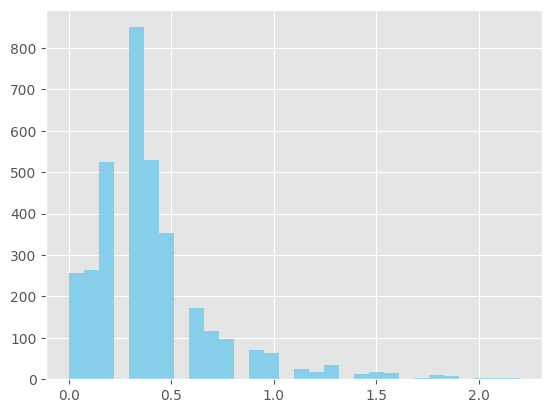

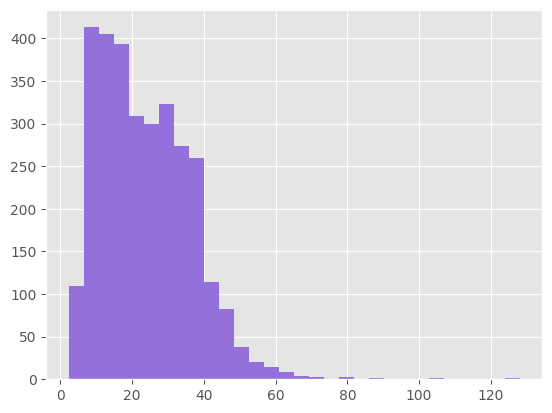

In [240]:
plt.hist(ProvoAQ['NO2'], bins=30, color='mediumpurple')

plt.show()

In [264]:
weather_citations = pd.read_csv("WeatherCitations.csv")
weather_citations

,Citation,License.Plate.Vin,Fine,Issued,CitationText,Unpaid,Officer,Residence,IssuedDate,IssuedTime,temperature_2m_max,temperature_2m_min,temperature_2m_mean,rain_sum,snowfall_sum,wind_speed_10m_max
0,P2-07405,CA 1PG151X,0,"Jan 06, 2014 08:50 AM",NaN,False,2,CA,2014-01-06,08:50 AM,-3.3,-17.6,-10.5,0.0,0.0,6.8
1,P5-08047,UT 201TUY,30,"Jan 06, 2014 01:00 PM",NaN,False,5,UT,2014-01-06,01:00 PM,-3.3,-17.6,-10.5,0.0,0.0,6.8
2,P5-08046,VA XRW5196,8,"Jan 06, 2014 12:59 PM",NaN,False,5,VA,2014-01-06,12:59 PM,-3.3,-17.6,-10.5,0.0,0.0,6.8
3,P5-08045,NM M7MM42,30,"Jan 06, 2014 12:56 PM",NaN,False,5,NM,2014-01-06,12:56 PM,-3.3,-17.6,-10.5,0.0,0.0,6.8
4,P5-08044,MT 667345A,30,"Jan 06, 2014 12:55 PM",NaN,False,5,MT,2014-01-06,12:55 PM,-3.3,-17.6,-10.5,0.0,0.0,6.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105401,P6-19569,ID 6AVW68,0,"Aug 17, 2023 02:09 PM",NaN,False,6,ID,2023-08-17,02:09 PM,31.1,18.7,24.3,0.6,0.0,12.3
105402,P6-19570,UT 7S02VG,0,"Aug 17, 2023 02:12 PM",NaN,False,6,UT,2023-08-17,02:12 PM,31.1,18.7,24.3,0.6,0.0,12.3
105403,P6-19571,AB 6LP6B40,0,"Aug 17, 2023 02:20 PM",NaN,False,6,AB,2023-08-17,02:20 PM,31.1,18.7,24.3,0.6,0.0,12.3
105404,P6-19573,UT MU9D48,0,"Aug 17, 2023 04:35 PM",NaN,False,6,UT,2023-08-17,04:35 PM,31.1,18.7,24.3,0.6,0.0,12.3


,Citation,License.Plate.Vin,Fine,Issued,CitationText,Unpaid,Officer,Residence,IssuedDate,IssuedTime,...,temperature_2m_mean,rain_sum,snowfall_sum,wind_speed_10m_max,DATE,CO,NO2,O3,PM10,PM25
0,P2-07405,CA 1PG151X,0,"Jan 06, 2014 08:50 AM",NaN,False,2,CA,2014-01-06,08:50 AM,...,-10.5,0.0,0.0,6.8,2014-01-06,1.8,47.0,0.022,47.0,13.7
1,P5-08047,UT 201TUY,30,"Jan 06, 2014 01:00 PM",NaN,False,5,UT,2014-01-06,01:00 PM,...,-10.5,0.0,0.0,6.8,2014-01-06,1.8,47.0,0.022,47.0,13.7
2,P5-08046,VA XRW5196,8,"Jan 06, 2014 12:59 PM",NaN,False,5,VA,2014-01-06,12:59 PM,...,-10.5,0.0,0.0,6.8,2014-01-06,1.8,47.0,0.022,47.0,13.7
3,P5-08045,NM M7MM42,30,"Jan 06, 2014 12:56 PM",NaN,False,5,NM,2014-01-06,12:56 PM,...,-10.5,0.0,0.0,6.8,2014-01-06,1.8,47.0,0.022,47.0,13.7
4,P5-08044,MT 667345A,30,"Jan 06, 2014 12:55 PM",NaN,False,5,MT,2014-01-06,12:55 PM,...,-10.5,0.0,0.0,6.8,2014-01-06,1.8,47.0,0.022,47.0,13.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105401,P6-19569,ID 6AVW68,0,"Aug 17, 2023 02:09 PM",NaN,False,6,ID,2023-08-17,02:09 PM,...,24.3,0.6,0.0,12.3,NaN,NaN,NaN,NaN,NaN,NaN
105402,P6-19570,UT 7S02VG,0,"Aug 17, 2023 02:12 PM",NaN,False,6,UT,2023-08-17,02:12 PM,...,24.3,0.6,0.0,12.3,NaN,NaN,NaN,NaN,NaN,NaN
105403,P6-19571,AB 6LP6B40,0,"Aug 17, 2023 02:20 PM",NaN,False,6,AB,2023-08-17,02:20 PM,...,24.3,0.6,0.0,12.3,NaN,NaN,NaN,NaN,NaN,NaN
105404,P6-19573,UT MU9D48,0,"Aug 17, 2023 04:35 PM",NaN,False,6,UT,2023-08-17,04:35 PM,...,24.3,0.6,0.0,12.3,NaN,NaN,NaN,NaN,NaN,NaN


In [258]:
AQ.rename(columns={
    "DATE": "IssuedDate"
}, inplace=True)

In [267]:
weather_citations["IssuedDate"]= pd.to_datetime(weather_citations["IssuedDate"])
AQ["IssuedDate"] = pd.to_datetime(AQ["IssuedDate"])

In [272]:
citations = pd.merge(weather_citations, AQ, how="left")
citations

,Citation,License.Plate.Vin,Fine,Issued,CitationText,Unpaid,Officer,Residence,IssuedDate,IssuedTime,...,temperature_2m_min,temperature_2m_mean,rain_sum,snowfall_sum,wind_speed_10m_max,CO,NO2,O3,PM10,PM25
0,P2-07405,CA 1PG151X,0,"Jan 06, 2014 08:50 AM",NaN,False,2,CA,2014-01-06,08:50 AM,...,-17.6,-10.5,0.0,0.0,6.8,1.8,47.0,0.022,47.0,13.7
1,P5-08047,UT 201TUY,30,"Jan 06, 2014 01:00 PM",NaN,False,5,UT,2014-01-06,01:00 PM,...,-17.6,-10.5,0.0,0.0,6.8,1.8,47.0,0.022,47.0,13.7
2,P5-08046,VA XRW5196,8,"Jan 06, 2014 12:59 PM",NaN,False,5,VA,2014-01-06,12:59 PM,...,-17.6,-10.5,0.0,0.0,6.8,1.8,47.0,0.022,47.0,13.7
3,P5-08045,NM M7MM42,30,"Jan 06, 2014 12:56 PM",NaN,False,5,NM,2014-01-06,12:56 PM,...,-17.6,-10.5,0.0,0.0,6.8,1.8,47.0,0.022,47.0,13.7
4,P5-08044,MT 667345A,30,"Jan 06, 2014 12:55 PM",NaN,False,5,MT,2014-01-06,12:55 PM,...,-17.6,-10.5,0.0,0.0,6.8,1.8,47.0,0.022,47.0,13.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105401,P6-19569,ID 6AVW68,0,"Aug 17, 2023 02:09 PM",NaN,False,6,ID,2023-08-17,02:09 PM,...,18.7,24.3,0.6,0.0,12.3,102.0,9.0,110.0,36.0,25.0
105402,P6-19570,UT 7S02VG,0,"Aug 17, 2023 02:12 PM",NaN,False,6,UT,2023-08-17,02:12 PM,...,18.7,24.3,0.6,0.0,12.3,102.0,9.0,110.0,36.0,25.0
105403,P6-19571,AB 6LP6B40,0,"Aug 17, 2023 02:20 PM",NaN,False,6,AB,2023-08-17,02:20 PM,...,18.7,24.3,0.6,0.0,12.3,102.0,9.0,110.0,36.0,25.0
105404,P6-19573,UT MU9D48,0,"Aug 17, 2023 04:35 PM",NaN,False,6,UT,2023-08-17,04:35 PM,...,18.7,24.3,0.6,0.0,12.3,102.0,9.0,110.0,36.0,25.0


In [277]:
#Clean the data
AQ[AQ["IssuedDate"].dt.month == 1]

,IssuedDate,CO,NO2,O3,PM10,PM25
0,2014-01-01,1.6,54.0,0.029,68.0,P 37.3
1,2014-01-02,1.8,52.0,0.02,54.0,25.0
2,2014-01-03,1.8,48.0,0.018,72.0,22.9
3,2014-01-04,1.9,46.0,0.035,62.0,13.3
4,2014-01-05,1.3,53.0,0.037,31.0,10.3
...,...,...,...,...,...,...
26,2023-01-27,458.0,23.6,69.2,19.0,18.0
27,2023-01-28,572.5,27.8,71.6,18.0,8.7
28,2023-01-29,343.5,17.7,67.2,14.0,7.0
29,2023-01-30,419.8,24.5,70.4,37.0,16.0


In [283]:
citations = pd.merge(weather_citations[weather_citations["IssuedDate"].dt.year < 2023], AQ, how="left")
citations

,Citation,License.Plate.Vin,Fine,Issued,CitationText,Unpaid,Officer,Residence,IssuedDate,IssuedTime,...,temperature_2m_min,temperature_2m_mean,rain_sum,snowfall_sum,wind_speed_10m_max,CO,NO2,O3,PM10,PM25
0,P2-07405,CA 1PG151X,0,"Jan 06, 2014 08:50 AM",NaN,False,2,CA,2014-01-06,08:50 AM,...,-17.6,-10.5,0.0,0.00,6.8,1.8,47.0,0.022,47.0,13.7
1,P5-08047,UT 201TUY,30,"Jan 06, 2014 01:00 PM",NaN,False,5,UT,2014-01-06,01:00 PM,...,-17.6,-10.5,0.0,0.00,6.8,1.8,47.0,0.022,47.0,13.7
2,P5-08046,VA XRW5196,8,"Jan 06, 2014 12:59 PM",NaN,False,5,VA,2014-01-06,12:59 PM,...,-17.6,-10.5,0.0,0.00,6.8,1.8,47.0,0.022,47.0,13.7
3,P5-08045,NM M7MM42,30,"Jan 06, 2014 12:56 PM",NaN,False,5,NM,2014-01-06,12:56 PM,...,-17.6,-10.5,0.0,0.00,6.8,1.8,47.0,0.022,47.0,13.7
4,P5-08044,MT 667345A,30,"Jan 06, 2014 12:55 PM",NaN,False,5,MT,2014-01-06,12:55 PM,...,-17.6,-10.5,0.0,0.00,6.8,1.8,47.0,0.022,47.0,13.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89309,P6-17089,WA BYX2335,0,"Dec 29, 2022 12:39 PM",NaN,False,6,WA,2022-12-29,12:39 PM,...,-5.9,-2.5,0.0,0.49,5.8,0.3,26.9,0.032,6.0,1.9
89310,P6-17088,UT UN898V,40,"Dec 29, 2022 12:24 PM",NaN,False,6,UT,2022-12-29,12:24 PM,...,-5.9,-2.5,0.0,0.49,5.8,0.3,26.9,0.032,6.0,1.9
89311,P6-17087,WA C114CH5,40,"Dec 29, 2022 12:07 PM",NaN,False,6,WA,2022-12-29,12:07 PM,...,-5.9,-2.5,0.0,0.49,5.8,0.3,26.9,0.032,6.0,1.9
89312,P6-17086,UT 9S0G4V,40,"Dec 29, 2022 08:05 AM",NaN,False,6,UT,2022-12-29,08:05 AM,...,-5.9,-2.5,0.0,0.49,5.8,0.3,26.9,0.032,6.0,1.9


In [284]:
citations.to_csv("citations.csv", index=False)

C:\Users\Owner\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\internals\blocks.py:2323: RuntimeWarning: invalid value encountered in cast
  values = values.astype(str)
